## Problem statement :

Prepare a model for glass classification using KNN

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

### Load and check data

In [20]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### EDA

In [21]:
data.shape

(214, 10)

In [22]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

[Text(0, 0, '70'),
 Text(0, 0, '76'),
 Text(0, 0, '17'),
 Text(0, 0, '13'),
 Text(0, 0, '9'),
 Text(0, 0, '29')]

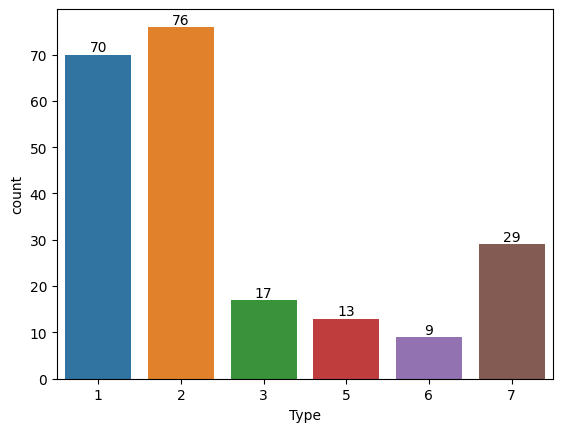

In [23]:
plot = sns.countplot(data=data, x='Type')
plot.bar_label(plot.containers[0])

In [24]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### pre processing

In [26]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [27]:
data.duplicated().sum()

1

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


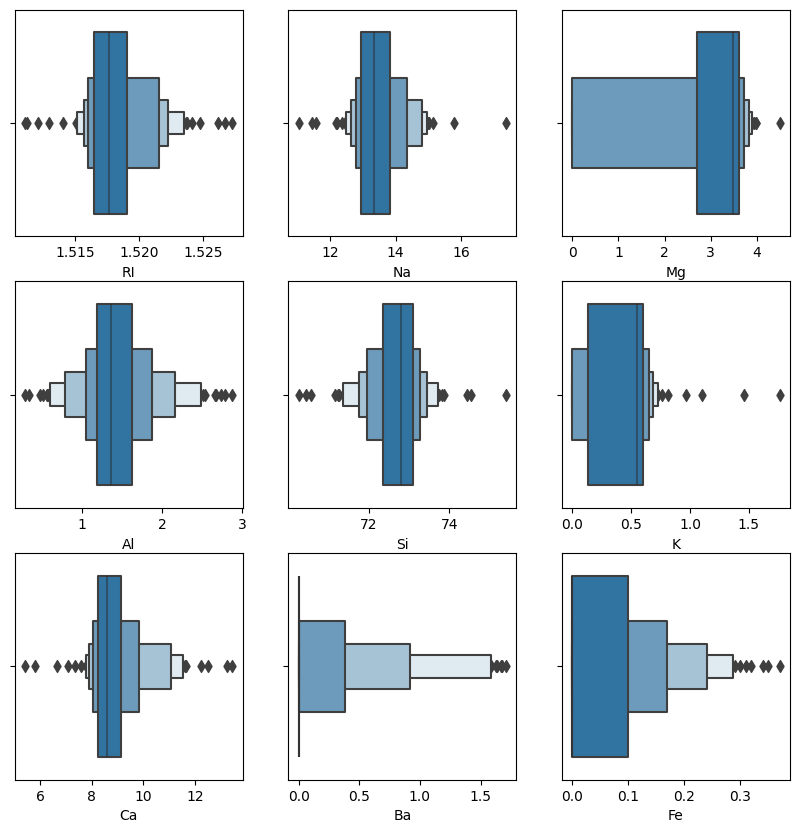

In [54]:
plt.figure(figsize=(10,10))
for i in range(len(data.columns)-1):
    plt.subplot(3,3,i+1)
    sns.boxenplot(data=data,x=data.columns[i])
    

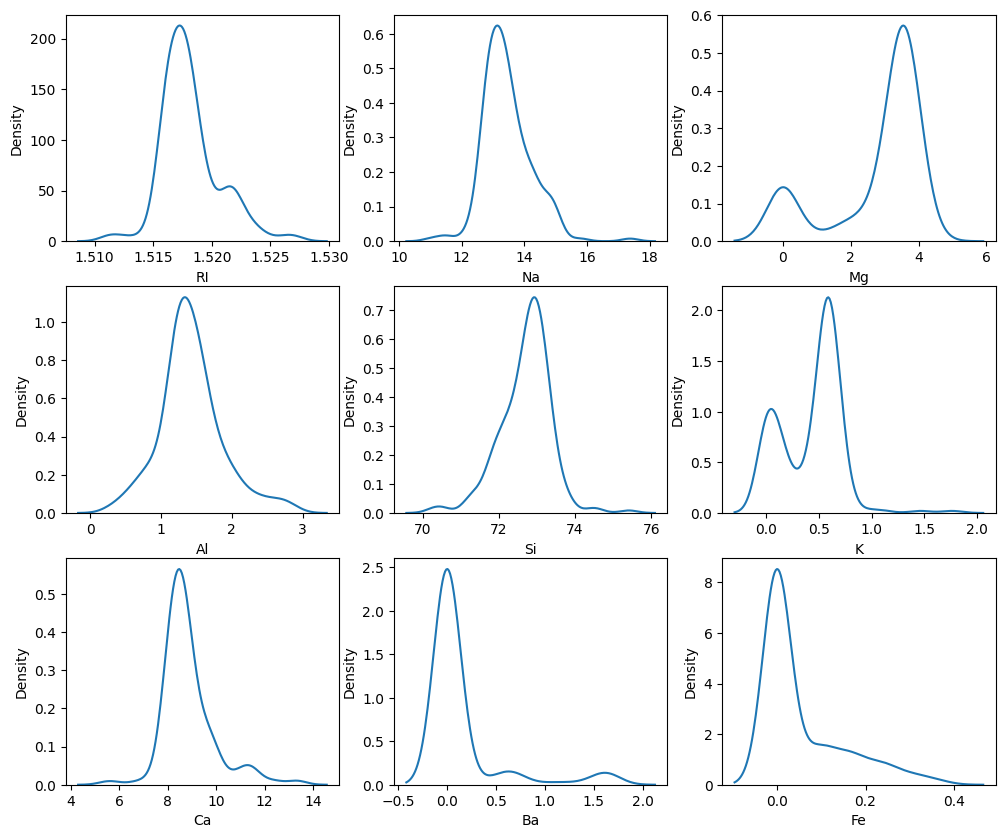

In [55]:
plt.figure(figsize=(12,10))
for i in range(len(data.columns)-1):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=data,x=data.columns[i])

In [48]:
print(f"outliers index in K : {data[data['K']>2].index}")
print(f"outliers index in Ca : {data[data['Ca']>14].index}")
print(f"outliers index in Ba : {data[data['Ba']>2.0].index}")
print(f"outliers index in Fe : {data[data['Fe']>0.4].index}")

outliers index in K : Int64Index([171, 172, 201], dtype='int64')
outliers index in Ca : Int64Index([107, 110, 111, 112], dtype='int64')
outliers index in Ba : Int64Index([106, 163, 207], dtype='int64')
outliers index in Fe : Int64Index([174], dtype='int64')


In [51]:
data.drop(data[data['K']>2].index, axis=0, inplace=True)
data.drop(data[data['Ca']>14].index, axis=0, inplace=True)
data.drop(data[data['Ba']>2.0].index, axis=0, inplace=True)
data.drop(data[data['Fe']>0.4].index, axis=0, inplace=True)

<AxesSubplot: >

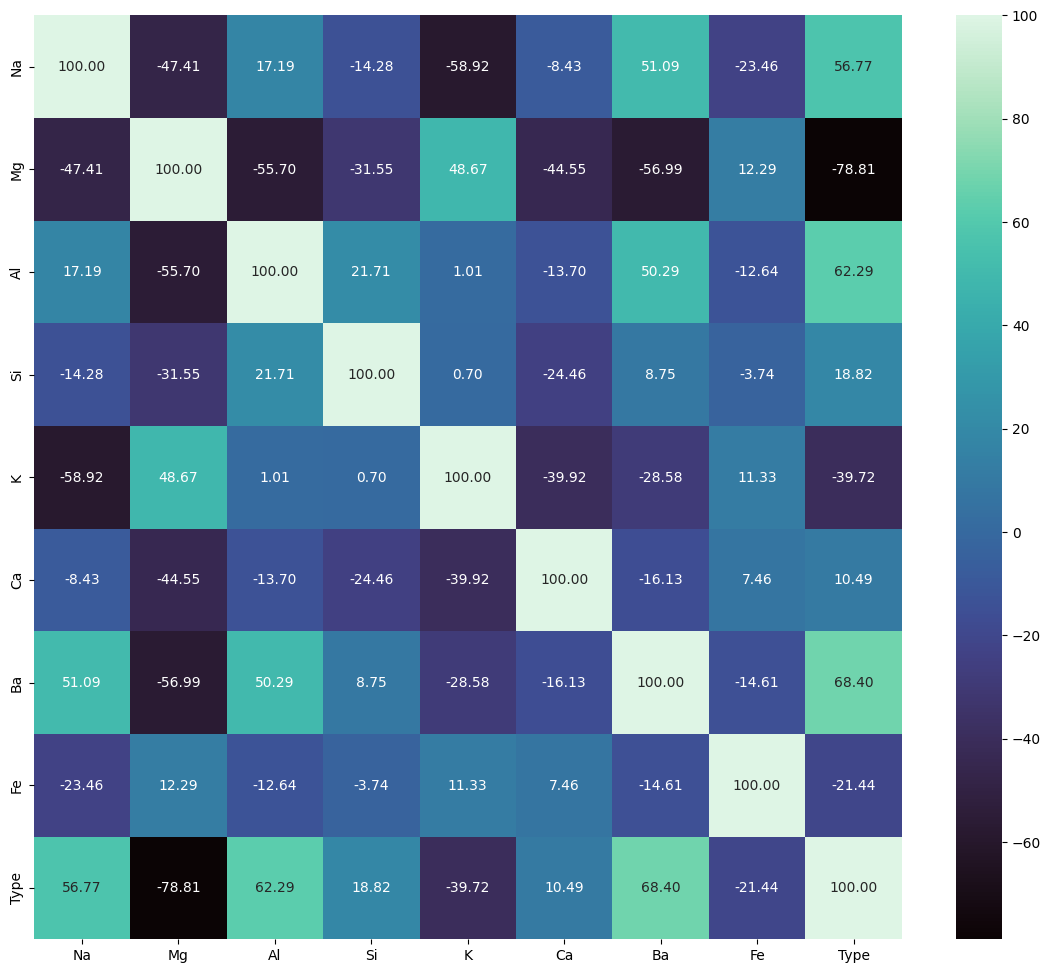

In [66]:
plt.figure(figsize=(14,12))
sns.heatmap(data=data.iloc[:,1:].corr()*100,annot=True,fmt='.2f',cmap='mako')

### Data prepration

In [57]:
x = data.drop('Type',axis=1)
y = data['Type']

In [58]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [59]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=21)

### Use GridSearchCV for getting the best parameters

In [60]:
param_grid = {'n_neighbors':range(1,20),
              'weights':['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [20, 30, 40],
              'p': [1, 2],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

In [61]:
knc = KNeighborsClassifier()
grid = GridSearchCV(estimator=knc, param_grid=param_grid, cv=4)
grid.fit(x,y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': range(1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [62]:
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters:  {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Best score:  0.7226470588235294


### Building model with best parameters

In [63]:
model = KNeighborsClassifier(n_neighbors = 6, leaf_size=20, p=1, metric='manhattan', weights = 'distance')
model.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=6, p=1,
                     weights='distance')

predict on test data

In [64]:
y_pred = model.predict(x_test)
y_pred

array([2, 1, 1, 1, 2, 1, 1, 6, 2, 2, 5, 2, 1, 1, 7, 1, 2, 7, 7, 1, 2],
      dtype=int64)

find accuracy on test data

In [65]:
np.mean(y_pred==y_test)*100

76.19047619047619